# CMPT 459 Assignment 2 Report Notebook

## 1. Implement KMeans

## 2. Plot silhouette coefficient for all clustering with random initialization

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from kmeans import KMeans
from main import read_data, preprocess_data, PCA, visualize_cluster

In [2]:
heart = read_data('scRNAseq_human_pancreas.csv')
heart = preprocess_data(heart)
X = PCA(heart.X, 100)
np.shape(X)

(4359, 100)

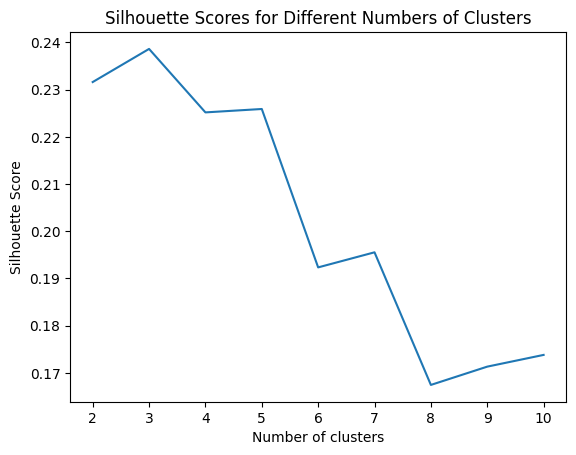

In [3]:
silhouette_scores = []
best_clustering_with_random_init = None
best_score_with_random_init = -1
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300)
    clustering = kmeans.fit(X)
    score = kmeans.silhouette(clustering, X)
    silhouette_scores.append(score)
    if score > best_score_with_random_init:
        best_score_with_random_init = score
        best_clustering_with_random_init = clustering
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

**What is the best k?**
- k = 3 gives the highest silhouette coefficient (global optimum).
- k = 2 or k = 5 also gives a high silhouette coefficient, but not as high as k = 3. (local optimum)
- We will use k = 3 for the scatter plot visualization.

## 3. Plot silhouette coefficient for all clustering with random initialization

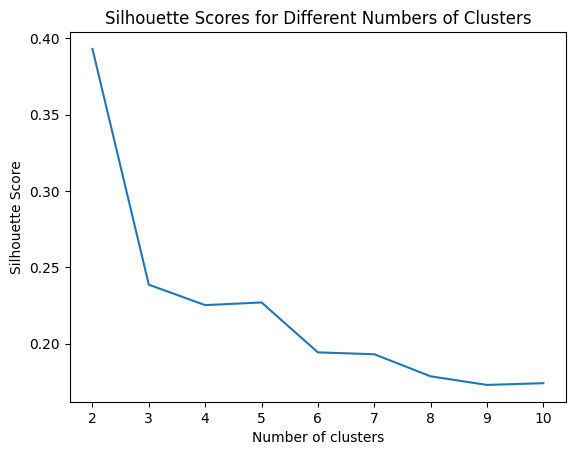

In [4]:
silhouette_scores = []
best_clustering_with_kmeans_init = None
best_score_with_kmeans_init = -1
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='kmeans++', max_iter=300)
    clustering = kmeans.fit(X)
    score = kmeans.silhouette(clustering, X)
    silhouette_scores.append(score)
    if score > best_score_with_kmeans_init:
        best_score_with_kmeans_init = score
        best_clustering_with_kmeans_init = clustering
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

**What is the best k?**
- Depend on our goal
- If we want to maximize silhouette coefficient, k = 2 is the best choice.
- Depends on the domain context, k = 3 or k = 5 might provide more meaningful and interpretable clusters 

In conclusion, while the silhouette coefficient suggests k = 2 is the mathematically optimal choice for cluster seperation, the local peak at k = 3 or k = 5, combined with the context of the data and objectives of the analysis, might make those values more suitable for practical applications. (We will use k = 2 for the scatter plot visualization below.)

## 4. Cluster Scatter Plots

**Cluster Scatter Plot with Random Initialization (k=3)**

In [ ]:
X = PCA(X, 2)

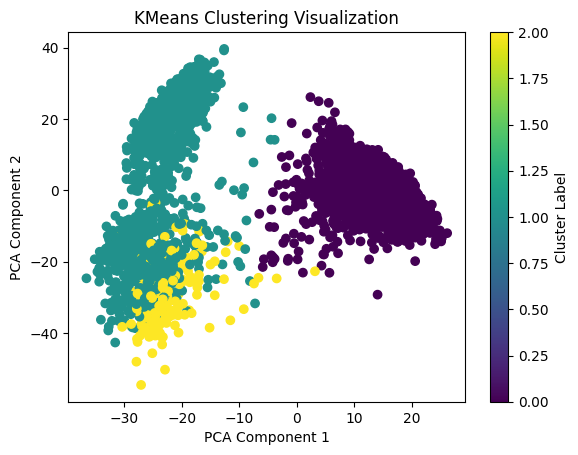

In [17]:
visualize_cluster(X[:, 0], X[:, 1], best_clustering_with_random_init)

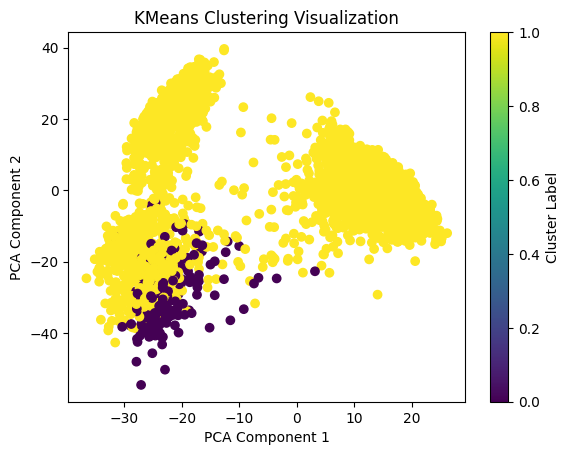

In [18]:
visualize_cluster(X[:, 0], X[:, 1], best_clustering_with_kmeans_init)